<h1>INVESTIGATION OF CUSTOMER SUPPORT OFFERED IN THE UGANDAN TELECOM INDUSTRY - CUSTOMERS DATASET</h1>

<h2>Table of Contents</h2>
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling Phase</a></li>
    <li><a href="#cleaning">Data Cleaning Phase</a></li>
    <li><a href="#exploration">Data Exploration Phase</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="intro"></a>
<h2>Introduction</h2>

<p>This dataset is a collection of responses to my <a href="https://forms.gle/rEnU9mcDuduQQpr58">survey</a> that seeks to investigate the perception of clients on existing customer support channels in the telecom industry in Uganda, as well as their views on proposed solutions to some of the challenges therein. It was accomplished as a partial requirement to attain my bachelor's degree in computer science at Makerere University, in 2023.</p>

<p>In this notebook, i'll be answering the following questions:</p>

<strong>Single variable (1d) questions:</strong>
<ol>
    <li>Which <u>telecom service provider</u> is considered the primary service provider by most respondents? <a href="#1d-1">go-to</a></li>
    <li>On which <u>social media platform</u> do most respondents have an account? <a href="#1d-2">go-to</a></li>
    <li>Which <u>two social media channels</u> are considered the best for sending a complaint to a telecom company? <a href="#1d-3">go-to</a></li>
    <li>Which <u>three features</u> are considered most essential by customers in a customer support platform? <a href="#1d-4">go-to</a></li>
    <li>Which <u>factor</u> is most important to customers when contacting customer support? <a href="#1d-5">go-to</a></li>
    <li>How <u>comfortable</u> are customers with texting a chatbot when receiving customer support? <a href="#1d-6">go-to</a></li>
    <li>How <u>necessary</u> is a platfrom dedicated to creating and managing customer support complaints to respondents? <a href="#1d-7">go-to</a></li>
</ol>

<strong>Multivariable (2d...) questions:</strong>
<ol>
    <li>What is the relationship between the respondents' <u>primary telecom service provider</u> and their <u>contentment</u> with the customer support services? <a href="#2d-1">go-to</a></li>
    <li>What is the relationship between the respondents' <u>satisifaction with the customer support services offered by their primary telecom service provider</u> and how <u>necessary they find a web/mobile application dedicated to creating and managing their customer support complaints and issues</u>? <a href="#2d-2">go-to</a></li>
    <li>What is the relationship between the <u>factors considered when receiving support</u> and the <u>employment status</u> of the respondents? <a href="#2d-3">go-to</a></li>
</ol>

In [28]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
import seaborn as sb
%matplotlib inline

In [2]:
# import customer_responses.csv
df = pd.read_csv('happyclient_customer_survey_responses.csv')

<a id="wrangling"></a>
<h2>DATA WRANGLING PHASE</h2>

In [3]:
# shape of the dataset
df.shape

(155, 27)

In [4]:
# columns of the dataset
columns_list = list(df.columns)

print('There are', len(columns_list), 'columns.')

for index, column_name in enumerate(columns_list):
    print("{}. {}".format(index + 1, column_name))

There are 27 columns.
1. Timestamp
2. gender
3. age_range
4. marital_status
5. education_level
6. employment_status
7. main_telecom
8. social_media_accounts
9. challenges_in_cs
10. best_social_media_for_cs
11. chatbot_acceptance
12. main_telecom_cs_csat
13. rating_of_national_cs
14. need_for_cs_website
15. need_for_cs_mobile_app
16. need_for_cs_live_chat
17. need_for_cs_video_and_screen_sharing
18. need_for_cs_multilingual
19. need_for_cs_image_sharing
20. need_for_cs_self_help_repos
21. need_for_cs_recommended_solutions
22. need_for_cs_ticket_status_display
23. need_for_cs_scheduled_support
24. need_for_agents_rate_and_review
25. need_for_cs_discussion_forums
26. most_important_factor_in_cs
27. necessity_of_cs_dedicated_platform


In [5]:
# data types of columns
df.dtypes

Timestamp                               object
gender                                  object
age_range                               object
marital_status                          object
education_level                         object
employment_status                       object
main_telecom                            object
social_media_accounts                   object
challenges_in_cs                        object
best_social_media_for_cs                object
chatbot_acceptance                       int64
main_telecom_cs_csat                     int64
rating_of_national_cs                    int64
need_for_cs_website                     object
need_for_cs_mobile_app                  object
need_for_cs_live_chat                   object
need_for_cs_video_and_screen_sharing    object
need_for_cs_multilingual                object
need_for_cs_image_sharing               object
need_for_cs_self_help_repos             object
need_for_cs_recommended_solutions       object
need_for_cs_t

In [6]:
# unique values per column
df.nunique()

Timestamp                               155
gender                                    2
age_range                                 4
marital_status                            3
education_level                           4
employment_status                         8
main_telecom                              5
social_media_accounts                    16
challenges_in_cs                         19
best_social_media_for_cs                 11
chatbot_acceptance                        5
main_telecom_cs_csat                      5
rating_of_national_cs                     5
need_for_cs_website                       4
need_for_cs_mobile_app                    4
need_for_cs_live_chat                     4
need_for_cs_video_and_screen_sharing      4
need_for_cs_multilingual                  4
need_for_cs_image_sharing                 4
need_for_cs_self_help_repos               4
need_for_cs_recommended_solutions         4
need_for_cs_ticket_status_display         4
need_for_cs_scheduled_support   

In [7]:
# head of the dataset (first three rows)
df.head(3)

,Timestamp,gender,age_range,marital_status,education_level,employment_status,main_telecom,social_media_accounts,challenges_in_cs,best_social_media_for_cs,...,need_for_cs_multilingual,need_for_cs_image_sharing,need_for_cs_self_help_repos,need_for_cs_recommended_solutions,need_for_cs_ticket_status_display,need_for_cs_scheduled_support,need_for_agents_rate_and_review,need_for_cs_discussion_forums,most_important_factor_in_cs,necessity_of_cs_dedicated_platform
0,18/08/2022 10:40:07,Male,20 years - 35 years,Cohabiting,Undergraduate,Student,MTN,"Email, WhatsApp, Twitter, Facebook, Telegram",Many steps have to be followed to talk to a cu...,Twitter,...,very essential,very essential,essential,very essential,very essential,very essential,essential,essential,Speed at which my issue is sorted.,Very necessary
1,18/08/2022 10:47:47,Male,20 years - 35 years,Single,Undergraduate,Student,AIRTEL,"Email, WhatsApp, Twitter, Telegram",Many steps have to be followed to talk to a cu...,WhatsApp,...,very essential,essential,not essential,not essential,essential,not essential,essential,I am not sure,Speed at which my issue is sorted.,Very necessary
2,18/08/2022 10:58:09,Male,20 years - 35 years,Single,Undergraduate,Student,AIRTEL,"Email, WhatsApp, Twitter, Facebook, Telegram",Many steps have to be followed to talk to a cu...,Twitter,...,very essential,very essential,very essential,very essential,very essential,very essential,essential,very essential,Speed at which my issue is sorted.,Very necessary


In [8]:
# tail of the dataset (last three rows)
df.tail(3)

,Timestamp,gender,age_range,marital_status,education_level,employment_status,main_telecom,social_media_accounts,challenges_in_cs,best_social_media_for_cs,...,need_for_cs_multilingual,need_for_cs_image_sharing,need_for_cs_self_help_repos,need_for_cs_recommended_solutions,need_for_cs_ticket_status_display,need_for_cs_scheduled_support,need_for_agents_rate_and_review,need_for_cs_discussion_forums,most_important_factor_in_cs,necessity_of_cs_dedicated_platform
152,20/08/2022 13:13:40,Male,20 years - 35 years,Single,Undergraduate,Student,MTN,"Email, WhatsApp, Twitter, Facebook, Telegram",Many steps have to be followed to talk to a cu...,WhatsApp,...,very essential,very essential,essential,very essential,very essential,essential,essential,essential,Speed at which my issue is sorted.,Very necessary
153,21/08/2022 18:53:09,Male,20 years - 35 years,Single,Post graduate and above,Employed on a salary,AIRTEL,"Email, WhatsApp, Twitter, Telegram",Many steps have to be followed to talk to a cu...,Email,...,very essential,very essential,very essential,essential,very essential,very essential,very essential,essential,Speed at which my issue is sorted.,Very necessary
154,21/08/2022 20:36:03,Female,20 years - 35 years,Married,Post graduate and above,Self employed,AIRTEL,"Email, WhatsApp",Many steps have to be followed to talk to a cu...,Email,...,very essential,very essential,essential,very essential,very essential,essential,essential,essential,Speed at which my issue is sorted.,I am not sure


In [9]:
# statistical description of the dataset
df.describe()

,chatbot_acceptance,main_telecom_cs_csat,rating_of_national_cs
count,155.00000,155.000000,155.000000
mean,3.03871,3.335484,2.993548
std,1.23206,0.962123,0.841279
min,1.00000,1.000000,1.000000
25%,2.00000,3.000000,3.000000
50%,3.00000,3.000000,3.000000
75%,4.00000,4.000000,3.000000
max,5.00000,5.000000,5.000000


In [10]:
# informative description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Timestamp                             155 non-null    object
 1   gender                                155 non-null    object
 2   age_range                             155 non-null    object
 3   marital_status                        155 non-null    object
 4   education_level                       155 non-null    object
 5   employment_status                     155 non-null    object
 6   main_telecom                          155 non-null    object
 7   social_media_accounts                 155 non-null    object
 8   challenges_in_cs                      155 non-null    object
 9   best_social_media_for_cs              155 non-null    object
 10  chatbot_acceptance                    155 non-null    int64 
 11  main_telecom_cs_csat            

<a id="cleaning"></a>
<h2>DATA CLEANING PHASE</h2>

In [11]:
# check for duplicated rows
df.duplicated().sum()

0

In [12]:
# check for and handle null values
df.isnull().sum()

Timestamp                               0
gender                                  0
age_range                               0
marital_status                          0
education_level                         0
employment_status                       0
main_telecom                            0
social_media_accounts                   0
challenges_in_cs                        0
best_social_media_for_cs                0
chatbot_acceptance                      0
main_telecom_cs_csat                    0
rating_of_national_cs                   0
need_for_cs_website                     0
need_for_cs_mobile_app                  0
need_for_cs_live_chat                   0
need_for_cs_video_and_screen_sharing    0
need_for_cs_multilingual                0
need_for_cs_image_sharing               0
need_for_cs_self_help_repos             0
need_for_cs_recommended_solutions       0
need_for_cs_ticket_status_display       0
need_for_cs_scheduled_support           0
need_for_agents_rate_and_review   

In [13]:
# clean column values

# clean gender column
df = df.replace({'Male': 'male', 'Female': 'female'})

# clean age column
df = df.replace({'below 19 years': '<19', '20 years - 35 years': '20-35', '35 years - 45 years': '35-40', 'above 45 years': '>45' })

# clean marital status column
df = df.replace({'Cohabiting': 'single', 'Single': 'single', 'Married': 'married'})

# clean education level column
df = df.replace({'Undergraduate': 'undergraduate', 'Secondary school': 'secondary', 'Vocational college': 'vocational', 'Post graduate and above': 'postgraduate'})

# clean employment status column 
df = df.replace({'Student': 'student', 'Self employed': 'self employed', "Unemployed, looking for work": 'unemployed', 'Employed on a salary': 'salary earner', 'Retired': 'retired', 'Volunteering ': 'unemployed', 'Student & self employed ': 'self employed', 'Confidential': 'unknown_status'})

# clean main telecom column
df = df.replace({'MTN': 'MTN', 'AIRTEL': 'AIRTEL', 'Lyca mobile': 'Lycamobile', 'Lyca Mobile': 'Lycamobile'})

df['best_social_media_for_cs'] = df['best_social_media_for_cs'].replace({'whatsapp': 'WhatsApp', 'twitter': 'Twitter', 'email': 'Email', 'call': 'Call', 'facebook': 'Facebook', 'facebook ': 'Facebook', 'telegram': 'Telegram', 'sms': 'SMS'})
# clean social channels column
unclean_socials = list(df['social_media_accounts'])
clean_socials = []

for social_group in list(df['social_media_accounts']):
    clean_socials.append(social_group.lower().replace(';', ' | '))
    
df = df.replace(unclean_socials, clean_socials)

# clean challenges in support column
unclean_challenges = list(df['challenges_in_cs'])
clean_challenges = []

for challenges_group in list(df['challenges_in_cs']):
    clean_challenges = challenges_group.lower().replace(';', ' | ')
    clean_challenges = clean_challenges.replace('many steps have to be followed to talk to a customer care agent.', 'many steps to talk to an agent')
    clean_challenges = clean_challenges.replace('no/late responses to my customer support complaints on social media.', 'no or late responses to tickets')
    clean_challenges = clean_challenges.replace('connected to an agent with low technical knowledge needed to handle my issue.', 'connected to agent with low technical knowledge')
    clean_challenges = clean_challenges.replace('no/low availability of customer support agents late in the night.', 'no or few agents availabe at night')
    clean_challenges = clean_challenges.replace('no/low availability of customer support agents over the weekends.', 'no or few agents availabe on weekends')
    unclean_challenges.append(clean_challenges)
    
# clean best social for support column
df = df.replace({'Calls': 'Call', 'Phone call': 'Call', 'call': 'Call', 'Messages': 'SMS', 'Feedback message ': 'SMS', 'Facebook': 'Facebook', 'Phone call ': 'Call'})

# clean feat columns
df = df.replace({'I am not sure': 'not sure'})

# clean important factor in support column
df = df.replace({'Speed at which my issue is sorted.': 'Speed', 'How easy it is for me to have my issue sorted.': 'Ease', 'Ability to have my issue sorted on my own (without having to talk to an agent or someone)': 'Self service'})

# clean necessity of app for support column
df = df.replace({'very necessary': 'Very necessary', 'not necessary at all': 'Not necessary', 'not sure': 'Not sure'})

df.sample(10)

,Timestamp,gender,age_range,marital_status,education_level,employment_status,main_telecom,social_media_accounts,challenges_in_cs,best_social_media_for_cs,...,need_for_cs_multilingual,need_for_cs_image_sharing,need_for_cs_self_help_repos,need_for_cs_recommended_solutions,need_for_cs_ticket_status_display,need_for_cs_scheduled_support,need_for_agents_rate_and_review,need_for_cs_discussion_forums,most_important_factor_in_cs,necessity_of_cs_dedicated_platform
143,19/08/2022 17:56:14,male,20-35,single,undergraduate,student,AIRTEL,"email, whatsapp, twitter, facebook, telegram",Many steps have to be followed to talk to a cu...,email,...,very essential,not essential,very essential,very essential,very essential,essential,very essential,essential,Speed,Very necessary
123,19/08/2022 07:29:45,male,20-35,single,undergraduate,unemployed,MTN,telegram,Many steps have to be followed to talk to a cu...,email,...,not essential,essential,not essential,essential,essential,not essential,not essential,essential,Speed,Not sure
71,18/08/2022 18:23:48,male,20-35,single,undergraduate,student,AIRTEL,"email, whatsapp, twitter, facebook",Many steps have to be followed to talk to a cu...,whatsapp,...,very essential,essential,very essential,very essential,very essential,not essential,very essential,very essential,Speed,Very necessary
135,19/08/2022 12:44:32,female,20-35,single,undergraduate,self employed,AIRTEL,"email, whatsapp, telegram",Many steps have to be followed to talk to a cu...,email,...,very essential,very essential,very essential,very essential,very essential,very essential,very essential,very essential,Speed,Very necessary
40,18/08/2022 14:04:15,female,20-35,single,undergraduate,student,MTN,"email, whatsapp, twitter, facebook, telegram",Many steps have to be followed to talk to a cu...,email,...,very essential,essential,very essential,very essential,very essential,Not sure,essential,essential,Self service,Very necessary
36,18/08/2022 13:54:54,female,20-35,single,undergraduate,student,MTN,"email, whatsapp, twitter, telegram",Many steps have to be followed to talk to a cu...,email,...,essential,not essential,very essential,very essential,essential,Not sure,essential,very essential,Ease,Very necessary
7,18/08/2022 11:10:34,female,20-35,single,undergraduate,student,AIRTEL,"email, whatsapp, twitter, facebook, telegram",Many steps have to be followed to talk to a cu...,email,...,very essential,very essential,essential,very essential,very essential,essential,not essential,essential,Ease,Very necessary
65,18/08/2022 18:00:27,female,20-35,single,undergraduate,student,AIRTEL,"email, whatsapp, twitter, telegram",Many steps have to be followed to talk to a cu...,twitter,...,very essential,very essential,very essential,very essential,very essential,essential,very essential,essential,Speed,Not sure
12,18/08/2022 11:45:36,female,20-35,single,undergraduate,student,AIRTEL,"email, whatsapp, facebook",Many steps have to be followed to talk to a cu...,email,...,very essential,essential,very essential,essential,not essential,Not sure,essential,Not sure,Speed,Not sure
8,18/08/2022 11:18:32,male,20-35,single,undergraduate,student,AIRTEL,"email, whatsapp, twitter, facebook, telegram",Many steps have to be followed to talk to a cu...,email,...,very essential,very essential,very essential,very essential,essential,essential,very essential,essential,Speed,Very necessary


In [14]:
# convert columns to appropriate data types

<a id="exploration"></a>
<h2>DATA EXPLORATION PHASE</h2>

<h3>Reusable Functions:</h3>

In [15]:
# reusables

# colors
base_color = sb.color_palette()[0]
target_color = sb.color_palette()[2]
gray_color = sb.color_palette()[7]

# functions
  
from collections import OrderedDict 

def group_list(lst):
    res =  [(el, lst.count(el)) for el in lst]
    return list(OrderedDict(res).items())

# sub dataframes
feature_columns = ["need_for_cs_website", "need_for_cs_mobile_app", "need_for_cs_live_chat", "need_for_cs_video_and_screen_sharing", "need_for_cs_multilingual", "need_for_cs_image_sharing", "need_for_cs_self_help_repos", "need_for_cs_recommended_solutions", "need_for_cs_ticket_status_display", "need_for_cs_scheduled_support", "need_for_agents_rate_and_review", "need_for_cs_discussion_forums"]

features_df = df[feature_columns]

<a id="1d-1"></a><h3>1. What is the <u>gender distribution</u> of the respondents?</h3>

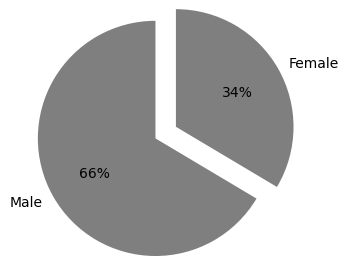

In [16]:
values = df['gender'].value_counts().reset_index()
labels = pd.Series(df['gender'].value_counts().index).apply(lambda x: x.capitalize())

plt.pie(data = values, labels = labels, explode = [0,0.3], x = 'gender', colors = [gray_color], autopct='%.0f%%', startangle=90, radius=1.5)
plt.savefig('gender_distribution.jpg', bbox_inches='tight')
plt.show()

<a id="1d-2"></a><h3>2. Which <u>telecom service provider</u> is considered the primary service provider by most respondents?</h3>

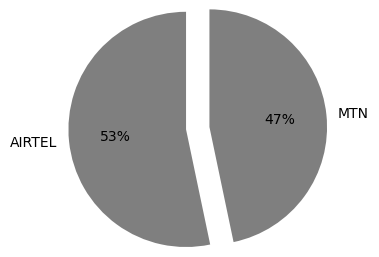

In [17]:
values = df['main_telecom'].value_counts().reset_index()[:2]
labels = pd.Series(df['main_telecom']).value_counts().index[:2]

plt.pie(data = values, labels = labels, explode = [0, 0.3], x = 'main_telecom', colors = [gray_color], autopct='%.0f%%', startangle=90, radius=1.5)
plt.savefig('telecom_providers_distribution.jpg', bbox_inches='tight')
plt.show()

<a id="1d-3"></a><h3>3. On which <u>social media platform</u> do most respondents have an account?</h3>

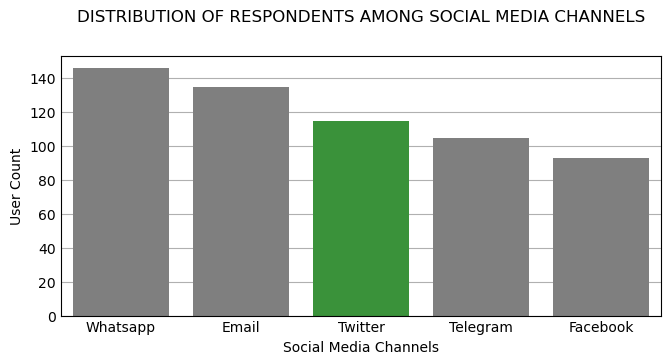

In [18]:
social_media_accounts_count = []

for string in list(df['social_media_accounts']):
    accounts = string.split(',')
    for account in accounts:
        social_media_accounts_count.append(account.strip().capitalize())
        
accounts_series = pd.Series(social_media_accounts_count)

accounts_df = pd.DataFrame(data=np.array(group_list(social_media_accounts_count)), columns=['social_account','user_count'])
accounts_df['user_count'] = pd.to_numeric(accounts_df['user_count'])
accounts_df.sort_values('user_count', inplace=True, ascending=False)

fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
plt.title('DISTRIBUTION OF RESPONDENTS AMONG SOCIAL MEDIA CHANNELS', y=1.1)
sb.barplot(data=accounts_df, x="social_account", y="user_count", palette=[gray_color, gray_color, target_color, gray_color, gray_color]);
plt.xlabel('Social Media Channels')
plt.ylabel('User Count')
plt.savefig('social_media_distribution.jpg', bbox_inches='tight')
plt.show();


<a id="1d-3"></a><h3>3. Which <u>two social media channels</u> are considered the best for sending a complaint to a telecom company?</h3>

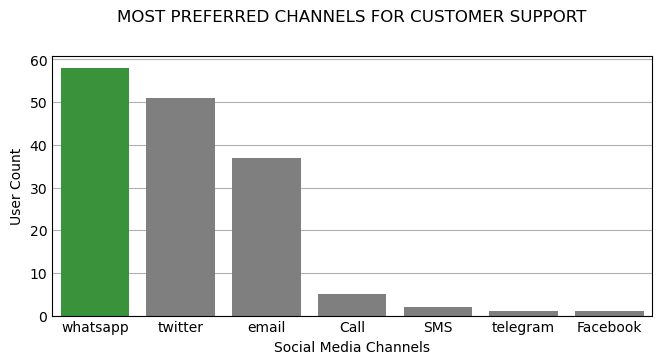

In [19]:
best_channels_df = pd.DataFrame(data=np.array(group_list(list(df['best_social_media_for_cs']))), columns=['social_account','user_count'])

best_channels_df['user_count'] = pd.to_numeric(best_channels_df['user_count'])
best_channels_df.sort_values('user_count', inplace=True, ascending=False)

fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
plt.title('MOST PREFERRED CHANNELS FOR CUSTOMER SUPPORT', y=1.1)
sb.barplot(data=best_channels_df, x="social_account", y="user_count", palette=[target_color, gray_color, gray_color, gray_color, gray_color, gray_color, gray_color]);
plt.xlabel('Social Media Channels')
plt.ylabel('User Count')
plt.savefig('best_social_media_for_cs.jpg', bbox_inches='tight')
plt.show();

<a id="1d-4"></a><h3>4. Which features are considered most essential by customers in a customer support platform?</h3>

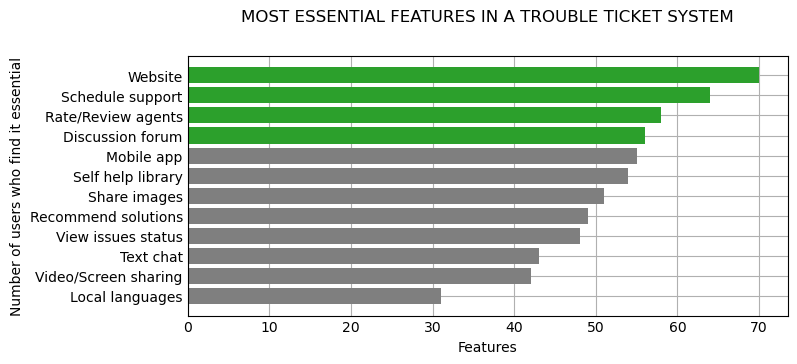

In [20]:
feat_columns_labels = [
    "Website",
    "Mobile app",
    "Text chat",
    "Video/Screen sharing",
    "Local languages",
    "Share images",
    "Self help library",
    "Recommend solutions",
    "View issues status",
    "Schedule support",
    "Rate/Review agents",
    "Discussion forum"
]

essentials_counts_per_column = (features_df == 'essential').sum().to_numpy()

essential_counts_df = pd.DataFrame(data=essentials_counts_per_column, columns=['essential_counts'], index=feat_columns_labels).sort_values(by=['essential_counts'], ascending=False)

essential_counts_df['essential_counts'] = pd.to_numeric(essential_counts_df['essential_counts'])
essential_counts_df.sort_values('essential_counts', inplace=True, ascending=True)

labels = essential_counts_df['essential_counts'].index
values = essential_counts_df['essential_counts'].values

fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
ax.barh(labels,values, color=[gray_color, gray_color, gray_color, gray_color, gray_color, gray_color, gray_color, gray_color, target_color, target_color, target_color, target_color])
plt.title('MOST ESSENTIAL FEATURES IN A TROUBLE TICKET SYSTEM', y=1.1)
plt.xlabel('Features')
plt.ylabel('Number of users who find it essential')
plt.savefig('essential_features.jpg', bbox_inches='tight')
plt.show();

<a id="1d-5"></a><h3>5. Which <u>factor</u> is most important to customers when contacting customer support?</h3>

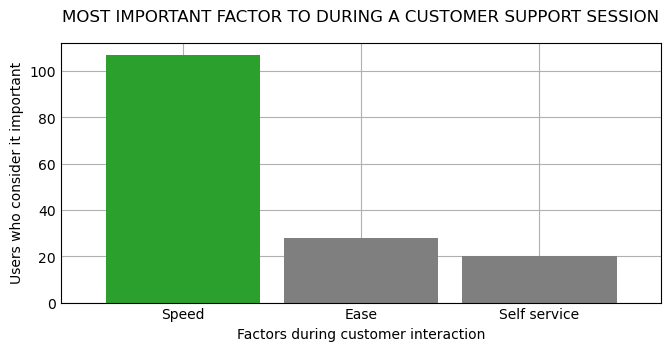

In [21]:
important_factors_count = pd.Series(df['most_important_factor_in_cs']).value_counts(ascending=False)

fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
important_factors_count.plot(kind='bar', color=[target_color, gray_color, gray_color], width=0.87)
plt.title('MOST IMPORTANT FACTOR TO DURING A CUSTOMER SUPPORT SESSION', y=1.05)
plt.xlabel('Factors during customer interaction')
plt.ylabel('Users who consider it important')
plt.xticks(rotation=0)
plt.savefig('important_factors_in_cs.jpg', bbox_inches='tight')

<a id="1d-6"></a><h3>6. Rating of national customer support</h3>

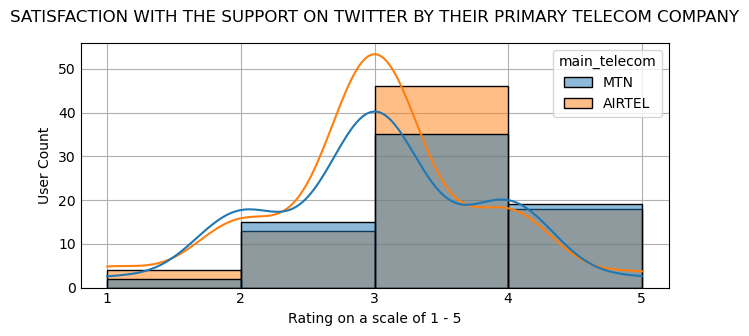

In [22]:
df_copy = df.copy()

df_copy['main_telecom'].replace({'Lycamobile': np.nan}, inplace=True)

# df_copy[df_copy['main_telecom'] == 'AIRTEL']['rating_of_national_cs'].value_counts()

plt.figure(figsize=(6,2.5))
sb.histplot(data=df_copy, x='rating_of_national_cs', bins=np.arange(1,6,1), kde=True, color=sb.color_palette()[0], hue='main_telecom');
plt.title('SATISFACTION WITH THE SUPPORT ON TWITTER BY THEIR PRIMARY TELECOM COMPANY', y=1.05)
plt.xlabel('Rating on a scale of 1 - 5')
plt.ylabel('User Count')
plt.xticks([1,2,3,4,5]);
plt.savefig('rating_of_national_cs.jpg', bbox_inches='tight')

<a id="1d-7"></a><h3>7. How <u>necessary</u> is a platfrom dedicated to creating and managing customer support complaints to respondents?</h3>

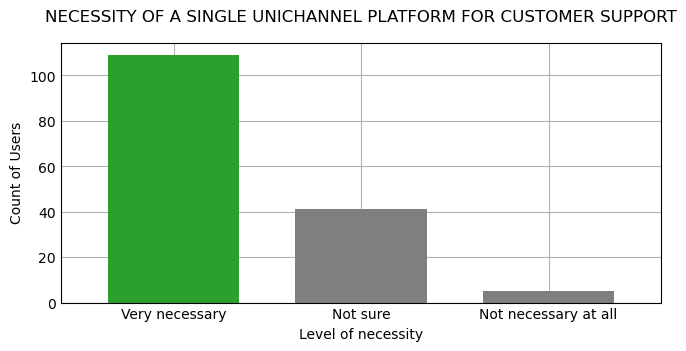

In [23]:
necessity_of_support_platform_counts = pd.Series(df['necessity_of_cs_dedicated_platform']).value_counts(ascending=False)

fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
necessity_of_support_platform_counts.plot(kind='bar', color=[target_color, gray_color, gray_color], width=0.7)
plt.title('NECESSITY OF A SINGLE UNICHANNEL PLATFORM FOR CUSTOMER SUPPORT', y=1.05)
plt.xlabel('Level of necessity')
plt.ylabel('Count of Users')
plt.xticks(rotation=0, horizontalalignment='center');
plt.savefig('necessity_of_platform.jpg', bbox_inches='tight')

<a id="2d-1"></a><h3>8. What challenges are faced most by users?</h3>

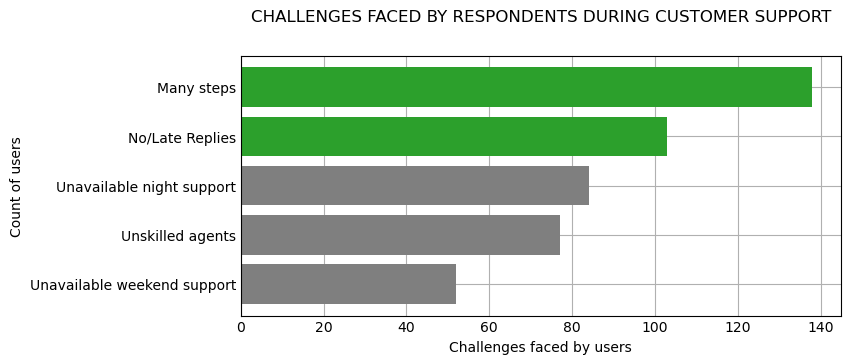

In [24]:
challenges_dict = {
    'Many steps have to be followed to talk to a customer care agent.': 'Many steps',
    'No/late responses to my customer support complaints on social media.': 'No/Late Replies',
    'Connected to an agent with low technical knowledge needed to handle my issue.': 'Unskilled agents',
    'No/low availability of customer support agents late in the night.': 'Unavailable night support',
    'No/low availability of customer support agents over the weekends.': 'Unavailable weekend support'
}
challenges_count = []

for string in list(df['challenges_in_cs']):
    challenges = string.split(',')
    for challenge in challenges:
        clean_challenge = challenge.strip()
        if clean_challenge in challenges_dict:
            challenges_count.append(challenges_dict[clean_challenge]) 
            
challenges_series = pd.Series(challenges_count)

challenges_df = pd.DataFrame(data=np.array(group_list(challenges_count)), columns=['challenge','affected_user_count'])

challenges_df['affected_user_count'] = pd.to_numeric(challenges_df['affected_user_count'])

challenges_df.sort_values('affected_user_count', inplace=True)

labels = challenges_df['challenge'].value_counts(ascending=True).index
values = challenges_df['affected_user_count']

fig = plt.figure()
ax = fig.add_axes([0,0,3,1.3])
ax.barh(labels,values, color=[gray_color, gray_color, gray_color, target_color, target_color])
plt.title('CHALLENGES FACED BY RESPONDENTS DURING CUSTOMER SUPPORT', y=1.1)
plt.xlabel('Challenges faced by users')
plt.ylabel('Count of users')
plt.savefig('challenges_in_cs.jpg', bbox_inches='tight')
plt.show();

<a id="2d-2"></a><h3>Chatbot acceptance</h3>

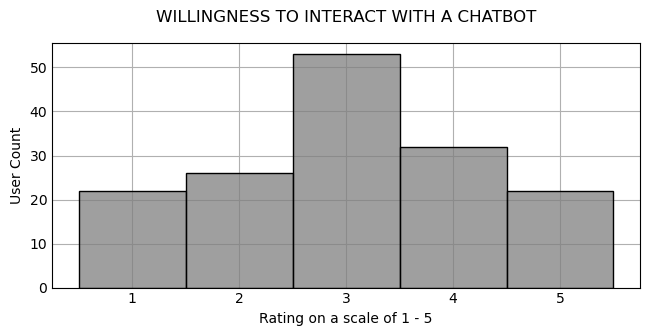

In [25]:
plt.figure(figsize=(6,2.5))
sb.histplot(data=df, x='chatbot_acceptance', bins=np.arange(1,7,1), color=gray_color);
plt.title('WILLINGNESS TO INTERACT WITH A CHATBOT', y=1.05)
plt.xlabel('Rating on a scale of 1 - 5')
plt.ylabel('User Count')
plt.xticks([1.5,2.5,3.5,4.5,5.5], [1,2,3,4,5]);
plt.savefig('chatbot_acceptance.jpg', bbox_inches='tight')

<a id="2d-3"></a><h3>7. What is the relationship between the <u>factors considered when receiving support</u> and the <u>employment status</u> of the respondents?</h3>

<a id="conclusion"></a>
<h2>CONCLUSION</h2>
<div>
    <h3>Summary of analysis:</h3>
    <h4>Descriptive summary:</h4>
    <p></p>
    <h4>Exploratory summary:</h4>
    <h5>1d exploratory findings:</h5>
    <ol>
        <li></li>
    </ol>
    <h5>Multidimensional exploratory finding:</h5>
    <ol>
        <li></li>
    </ol>
</div>
<div>
    <h3>Limitations:</h3>
    <ul>
        <li></li>
    </ul>
<div>
    <h3>Resources used:</h3>
    <ul>
        <li>Kaggle: <i>https://kaggle.com</i></li>
        <li>Pandas Documentation: <i>https://pandas.pydata.org/docs/index.html</i></li>
        <li>Seaborn API Reference: <i>https://seaborn.pydata.org/api.html</i></li>
        <li>NumPy Documentation: <i>https://numpy.org/doc/stable/</i></li>
        <li>"Correlation does not imply causation": <i>https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation</i></li>
    </ul>
</div>